In [1]:
from google.colab import files

In [ ]:
files.upload()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
df = pd.read_csv('/content/train.csv')

In [15]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [16]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [50]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Data Visualization

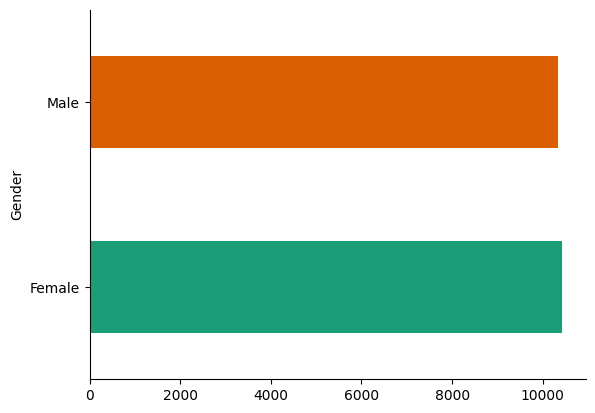

In [14]:
# @title Gender
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

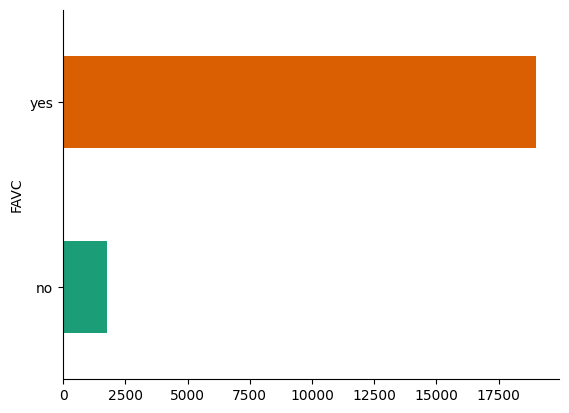

In [12]:
# @title FAVC
df.groupby('FAVC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

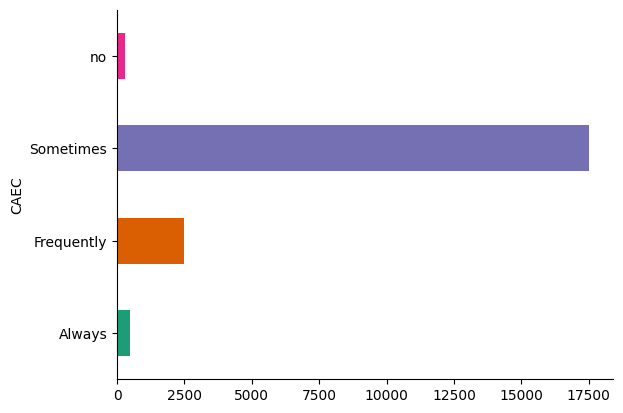

In [11]:
# @title CAEC
df.groupby('CAEC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

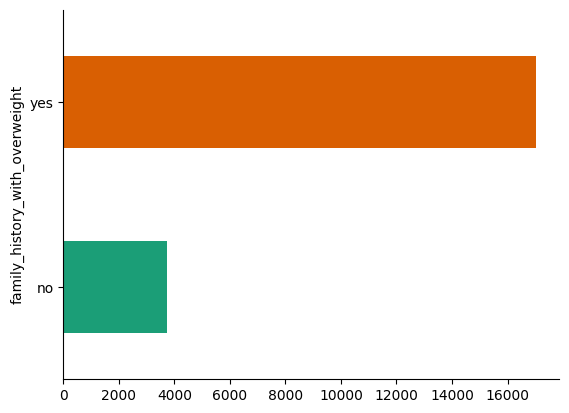

In [10]:
# @title family_history_with_overweight
df.groupby('family_history_with_overweight').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

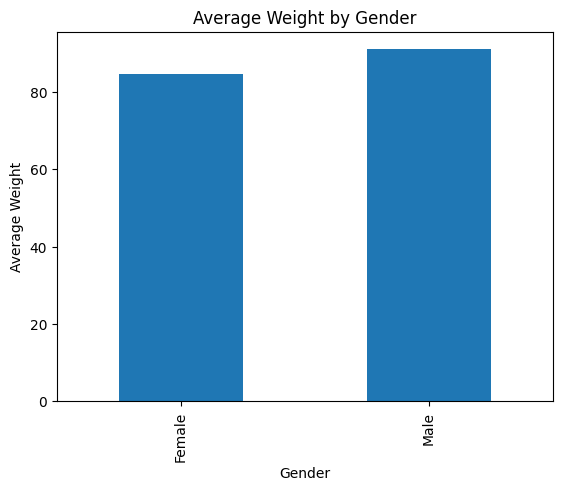

In [9]:
# @title Average Weight by Gender
df.groupby('Gender')['Weight'].mean().plot(kind='bar')
plt.title('Average Weight by Gender')
_ = plt.ylabel('Average Weight')

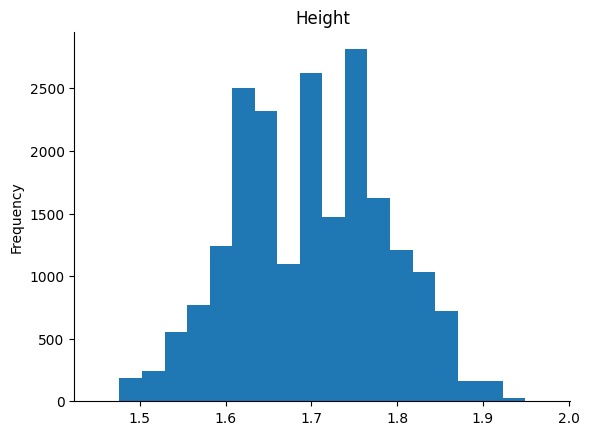

In [8]:
# @title Height
df['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

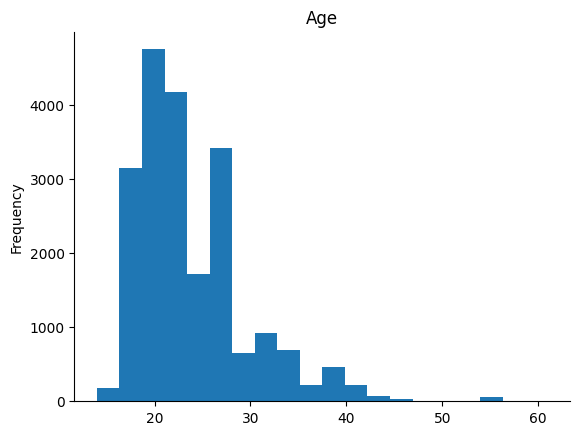

In [7]:
# @title Age
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data Preprocesssing

In [36]:
cat_columns = df.select_dtypes(['object']).columns
cat_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [37]:
num_columns = df.select_dtypes(exclude = ['object']).columns
num_columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [38]:
df_enc_cat = pd.get_dummies(df[cat_columns]).astype(int)

In [39]:
num_columns = num_columns.drop('id')

In [40]:
num_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

Text(0.5, 1.0, 'Correlation Mat for Num_Values')

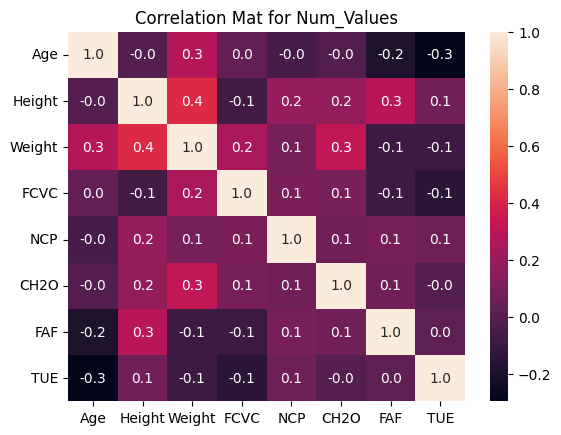

In [43]:
corr_mat = df[num_columns].corr()
sns.heatmap(corr_mat, annot = True, fmt = '.1f')
plt.title('Correlation Mat for Num_Values')

Text(0.5, 1.0, 'Correlation Mat for Cat_Values')

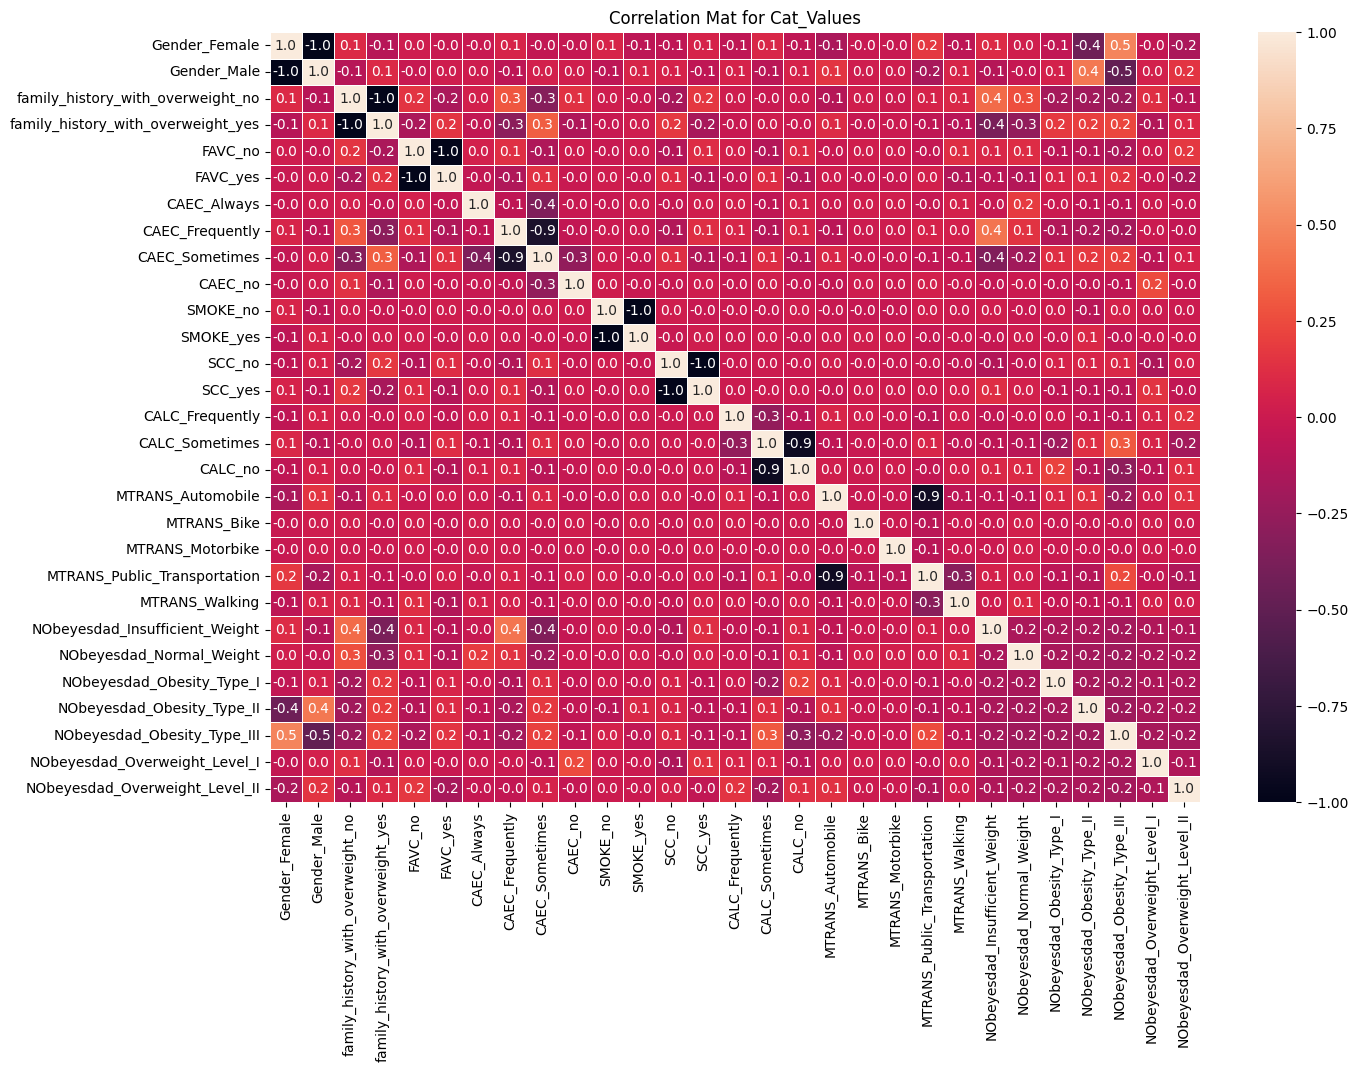

In [49]:
corr_mat = df_enc_cat.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_mat, annot = True, fmt = '.1f', linewidths = 0.5)
plt.title('Correlation Mat for Cat_Values')

In [65]:
df[num_columns]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


In [64]:
df[num_columns].Age.max(), df[num_columns].Age.min()

(61.0, 14.0)

In [66]:
df[num_columns].Height.max(), df[num_columns].Height.min()

(1.975663, 1.45)

In [67]:
df[num_columns].Weight.max(), df[num_columns].Weight.min()

(165.057269, 39.0)

In [68]:
df[num_columns].FCVC.max(), df[num_columns].FCVC.min()

(3.0, 1.0)

In [69]:
df[num_columns].NCP.max(), df[num_columns].NCP.min()

(4.0, 1.0)

In [70]:
df[num_columns].CH2O.max(), df[num_columns].CH2O.min()

(3.0, 1.0)

In [71]:
df[num_columns].FAF.max(), df[num_columns].FAF.min()

(3.0, 0.0)

In [72]:
df[num_columns].TUE.max(), df[num_columns].TUE.min()

(2.0, 0.0)

In [88]:
scaled_df = df[num_columns].copy()
scaled_df.Age = scaled_df['Age'] / scaled_df['Age'].max()
scaled_df.Height = scaled_df['Height'] / scaled_df['Height'].max()
scaled_df.Weight = scaled_df['Weight'] / scaled_df['Weight'].max()
scaled_df.FCVC = scaled_df['FCVC'] / scaled_df['FCVC'].max()
scaled_df.NCP = scaled_df['NCP'] / scaled_df['NCP'].max()
scaled_df.CH2O = scaled_df['CH2O'] / scaled_df['CH2O'].max()
scaled_df.FAF = scaled_df['FAF'] / scaled_df['FAF'].max()
scaled_df.TUE = scaled_df['TUE'] / scaled_df['TUE'].max()

In [89]:
scaled_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.400705,0.860470,0.494798,0.666667,0.745824,0.921191,0.000000,0.488237
1,0.295082,0.789608,0.345335,0.666667,0.750000,0.666667,0.333333,0.500000
2,0.295082,0.866271,0.303929,0.626845,0.352921,0.636793,0.288682,0.836792
3,0.343487,0.865902,0.795329,1.000000,0.750000,0.558020,0.489288,0.390099
4,0.518706,0.968883,0.568276,0.893221,0.492868,0.659949,0.655991,0.465861
...,...,...,...,...,...,...,...,...
20753,0.412083,0.894194,0.691803,0.973195,0.750000,0.717270,0.443506,0.098340
20754,0.295082,0.865532,0.302925,1.000000,1.000000,0.333333,0.666667,0.500000
20755,0.329525,0.920986,0.639660,0.802606,0.750000,0.666667,0.386013,0.599220
20756,0.554966,0.860471,0.506007,0.890413,0.492868,0.714946,0.000000,0.486917


In [90]:
df_new = pd.concat([scaled_df, df_enc_cat], axis = 1)

In [91]:
df_new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.400705,0.860470,0.494798,0.666667,0.745824,0.921191,0.000000,0.488237,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0.295082,0.789608,0.345335,0.666667,0.750000,0.666667,0.333333,0.500000,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.295082,0.866271,0.303929,0.626845,0.352921,0.636793,0.288682,0.836792,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0.343487,0.865902,0.795329,1.000000,0.750000,0.558020,0.489288,0.390099,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.518706,0.968883,0.568276,0.893221,0.492868,0.659949,0.655991,0.465861,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.412083,0.894194,0.691803,0.973195,0.750000,0.717270,0.443506,0.098340,0,1,...,0,1,0,0,0,0,1,0,0,0
20754,0.295082,0.865532,0.302925,1.000000,1.000000,0.333333,0.666667,0.500000,0,1,...,0,1,0,1,0,0,0,0,0,0
20755,0.329525,0.920986,0.639660,0.802606,0.750000,0.666667,0.386013,0.599220,0,1,...,0,1,0,0,0,0,1,0,0,0
20756,0.554966,0.860471,0.506007,0.890413,0.492868,0.714946,0.000000,0.486917,0,1,...,0,0,0,0,0,0,0,0,0,1


In [92]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 20758 non-null  float64
 1   Height                              20758 non-null  float64
 2   Weight                              20758 non-null  float64
 3   FCVC                                20758 non-null  float64
 4   NCP                                 20758 non-null  float64
 5   CH2O                                20758 non-null  float64
 6   FAF                                 20758 non-null  float64
 7   TUE                                 20758 non-null  float64
 8   Gender_Female                       20758 non-null  int64  
 9   Gender_Male                         20758 non-null  int64  
 10  family_history_with_overweight_no   20758 non-null  int64  
 11  family_history_with_overweight_yes  20758

## Data Modelling

In [93]:
selected_col = ['NObeyesdad_Insufficient_Weight',
                'NObeyesdad_Normal_Weight',
                'NObeyesdad_Obesity_Type_I',
                'NObeyesdad_Obesity_Type_II',
                'NObeyesdad_Obesity_Type_III',
                'NObeyesdad_Overweight_Level_I',
                'NObeyesdad_Overweight_Level_II']

X = df_new.drop(selected_col, axis = 1)
y = df_new[selected_col]

In [94]:
len(X), len(y)

(20758, 20758)

In [95]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.400705,0.860470,0.494798,0.666667,0.745824,0.921191,0.000000,0.488237,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0.295082,0.789608,0.345335,0.666667,0.750000,0.666667,0.333333,0.500000,1,0,...,1,0,0,0,1,1,0,0,0,0
2,0.295082,0.866271,0.303929,0.626845,0.352921,0.636793,0.288682,0.836792,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0.343487,0.865902,0.795329,1.000000,0.750000,0.558020,0.489288,0.390099,1,0,...,1,0,0,1,0,0,0,0,1,0
4,0.518706,0.968883,0.568276,0.893221,0.492868,0.659949,0.655991,0.465861,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.412083,0.894194,0.691803,0.973195,0.750000,0.717270,0.443506,0.098340,0,1,...,1,0,0,1,0,0,0,0,1,0
20754,0.295082,0.865532,0.302925,1.000000,1.000000,0.333333,0.666667,0.500000,0,1,...,1,0,0,1,0,0,0,0,1,0
20755,0.329525,0.920986,0.639660,0.802606,0.750000,0.666667,0.386013,0.599220,0,1,...,1,0,0,0,1,0,0,0,1,0
20756,0.554966,0.860471,0.506007,0.890413,0.492868,0.714946,0.000000,0.486917,0,1,...,1,0,0,0,1,1,0,0,0,0


In [96]:
y

,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
20753,0,0,0,1,0,0,0
20754,1,0,0,0,0,0,0
20755,0,0,0,1,0,0,0
20756,0,0,0,0,0,0,1


In [106]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 28, train_size = 0.7)

In [107]:
len(train_X), len(train_y)

(14530, 14530)

In [108]:
len(test_X), len(test_y)

(6228, 6228)

In [109]:
train_X.shape, train_y.shape

((14530, 30), (14530, 7))

## Model Creation

In [126]:
from tensorflow.keras import Sequential as SQ
from tensorflow.random import set_seed as SEED
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy as CCE
from tensorflow.keras.optimizers import SGD

In [173]:
SEED(28)

model = SQ()
model.add(Dense(30, activation = 'relu'))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))

In [268]:
model.compile(loss = CCE(),
              optimizer = SGD(learning_rate = 0.0001),
              metrics = ['accuracy'])

In [271]:
history = model.fit(train_X, train_y, epochs = 15, validation_data = [test_X, test_y])

Epoch 1/15
455/455 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8807 - val_loss: 0.3768 - val_accuracy: 0.8666
Epoch 2/15
455/455 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8801 - val_loss: 0.3759 - val_accuracy: 0.8688
Epoch 3/15
455/455 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8806 - val_loss: 0.3746 - val_accuracy: 0.8690
Epoch 4/15
455/455 [==============================] - 1s 3ms/step - loss: 0.3504 - accuracy: 0.8809 - val_loss: 0.3749 - val_accuracy: 0.8685
Epoch 5/15
455/455 [==============================] - 1s 2ms/step - loss: 0.3504 - accuracy: 0.8809 - val_loss: 0.3755 - val_accuracy: 0.8683
Epoch 6/15
455/455 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8810 - val_loss: 0.3744 - val_accuracy: 0.8688
Epoch 7/15
455/455 [==============================] - 2s 3ms/step - loss: 0.3503 - accuracy: 0.8809 - val_loss: 0.3742 - val_accuracy: 0.8683
Epoch 

In [285]:
predictions = model.predict(test_X)

195/195 [==============================] - 1s 3ms/step


In [286]:
max_ind = np.argmax(predictions, axis = 1)

In [287]:
max_ind

array([1, 5, 5, ..., 3, 3, 3])

In [288]:
one_hot_enc = np.eye(predictions.shape[1])[max_ind]

In [289]:
one_hot_enc

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [291]:
test_y = np.array(test_y)

In [292]:
test_y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [293]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, one_hot_enc)

In [295]:
round(accuracy, 2)

0.87

In [296]:
df_test = pd.read_csv('/content/test.csv')

In [297]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [298]:
df_test[num_columns]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069
...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000


In [300]:
cat_columns = cat_columns.drop('NObeyesdad')

In [301]:
df_test[cat_columns]

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
3,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...
13835,Male,yes,no,Sometimes,no,no,Sometimes,Public_Transportation
13836,Female,no,yes,Sometimes,no,no,Sometimes,Public_Transportation
13837,Female,no,yes,Frequently,no,no,Sometimes,Public_Transportation
13838,Male,yes,yes,Sometimes,no,no,no,Public_Transportation


In [303]:
df_test_enc = pd.get_dummies(df_test[cat_columns]).astype(int)

In [304]:
df_test_enc

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0,1,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
13836,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
13837,1,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
13838,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [306]:
scaled_df = df_test[num_columns].copy()
scaled_df.Age = scaled_df['Age'] / scaled_df['Age'].max()
scaled_df.Height = scaled_df['Height'] / scaled_df['Height'].max()
scaled_df.Weight = scaled_df['Weight'] / scaled_df['Weight'].max()
scaled_df.FCVC = scaled_df['FCVC'] / scaled_df['FCVC'].max()
scaled_df.NCP = scaled_df['NCP'] / scaled_df['NCP'].max()
scaled_df.CH2O = scaled_df['CH2O'] / scaled_df['CH2O'].max()
scaled_df.FAF = scaled_df['FAF'] / scaled_df['FAF'].max()
scaled_df.TUE = scaled_df['TUE'] / scaled_df['TUE'].max()

In [307]:
scaled_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.440982,0.933482,0.730923,0.979539,0.750000,0.941876,0.285133,0.000000
1,0.344262,0.808081,0.399861,0.666667,0.250000,1.000000,0.333333,0.000000
2,0.426230,0.829977,0.676132,1.000000,0.750000,0.873959,0.000000,0.125251
3,0.343922,0.784408,0.628080,0.666667,0.744477,0.928806,0.031617,0.000000
4,0.426230,0.821917,0.635145,1.000000,0.750000,0.884510,0.000000,0.370534
...,...,...,...,...,...,...,...,...
13835,0.382424,0.869386,0.472747,0.937745,0.750000,0.333333,0.269025,0.389316
13836,0.475410,0.803030,0.375627,1.000000,0.750000,0.666667,0.000000,0.000000
13837,0.375994,0.800781,0.268856,1.000000,0.568435,0.666667,0.649947,0.500000
13838,0.344262,0.818182,0.321101,0.666667,0.750000,0.666667,1.000000,1.000000


In [310]:
df_test_new = pd.concat([scaled_df, df_test_enc], axis = 1)

In [311]:
df_test_new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.440982,0.933482,0.730923,0.979539,0.750000,0.941876,0.285133,0.000000,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0.344262,0.808081,0.399861,0.666667,0.250000,1.000000,0.333333,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.426230,0.829977,0.676132,1.000000,0.750000,0.873959,0.000000,0.125251,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.343922,0.784408,0.628080,0.666667,0.744477,0.928806,0.031617,0.000000,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0.426230,0.821917,0.635145,1.000000,0.750000,0.884510,0.000000,0.370534,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0.382424,0.869386,0.472747,0.937745,0.750000,0.333333,0.269025,0.389316,0,1,...,0,0,0,1,0,0,0,0,1,0
13836,0.475410,0.803030,0.375627,1.000000,0.750000,0.666667,0.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
13837,0.375994,0.800781,0.268856,1.000000,0.568435,0.666667,0.649947,0.500000,1,0,...,0,0,0,1,0,0,0,0,1,0
13838,0.344262,0.818182,0.321101,0.666667,0.750000,0.666667,1.000000,1.000000,0,1,...,0,0,0,0,1,0,0,0,1,0


In [313]:
df_test_new.shape

(13840, 31)

In [314]:
set_1 = set(df_test_new.columns)

In [316]:
set_2 = set(X.columns)

In [319]:
diff_set = set_1.difference(set_2)

In [320]:
diff_set

{'CALC_Always'}

In [321]:
df_test_new_upd = df_test_new.drop('CALC_Always', axis = 1)

In [322]:
df_test_new_upd

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.440982,0.933482,0.730923,0.979539,0.750000,0.941876,0.285133,0.000000,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0.344262,0.808081,0.399861,0.666667,0.250000,1.000000,0.333333,0.000000,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0.426230,0.829977,0.676132,1.000000,0.750000,0.873959,0.000000,0.125251,1,0,...,1,0,0,1,0,0,0,0,1,0
3,0.343922,0.784408,0.628080,0.666667,0.744477,0.928806,0.031617,0.000000,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0.426230,0.821917,0.635145,1.000000,0.750000,0.884510,0.000000,0.370534,1,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0.382424,0.869386,0.472747,0.937745,0.750000,0.333333,0.269025,0.389316,0,1,...,1,0,0,1,0,0,0,0,1,0
13836,0.475410,0.803030,0.375627,1.000000,0.750000,0.666667,0.000000,0.000000,1,0,...,1,0,0,1,0,0,0,0,1,0
13837,0.375994,0.800781,0.268856,1.000000,0.568435,0.666667,0.649947,0.500000,1,0,...,1,0,0,1,0,0,0,0,1,0
13838,0.344262,0.818182,0.321101,0.666667,0.750000,0.666667,1.000000,1.000000,0,1,...,1,0,0,0,1,0,0,0,1,0


In [323]:
predictions_test = model.predict(df_test_new_upd)

433/433 [==============================] - 2s 3ms/step


In [327]:
max_ind = np.argmax(predictions_test, axis = 1)

In [328]:
max_ind

array([3, 5, 4, ..., 0, 0, 3])

In [330]:
prediction_arr = np.eye(predictions_test.shape[1])[max_ind]

In [332]:
prediction_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [337]:
list_name = []
for i in y.columns:
  name = str(i).split('NObeyesdad_')[1]
  list_name.append(name)

In [338]:
list_name

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [341]:
index_max = prediction_arr[0].argmax()
list_name[index_max]

'Obesity_Type_II'

In [342]:
labels = [list_name[row.argmax()] for row in prediction_arr]

In [344]:
len(labels)

13840

In [345]:
len(prediction_arr)

13840

In [346]:
submission_csv = pd.DataFrame({'id': df_test.id, 'NObeyesdad': labels})

In [348]:
submission_csv.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III


In [354]:
submission_csv.to_csv('submission.csv', index = False)

In [356]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>